<a href="https://colab.research.google.com/github/nishantkr2003/Plant-Disease-Detection/blob/main/Train_Plant_disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
print("Hello World!")

Hello World!


In [2]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

# Importing Libraries

In [2]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
!git clone https://github.com/nishantkr2003/Plant-Disease-Detection.git

Cloning into 'Plant-Disease-Detection'...
remote: Enumerating objects: 87960, done.
remote: Counting objects: 100% (33/33), done.
remote: Compressing objects: 100% (28/28), done.
remote: Total 87960 (delta 15), reused 17 (delta 5), pack-reused 87927 (from 2)
Receiving objects: 100% (87960/87960), 1.31 GiB | 17.58 MiB/s, done.
Resolving deltas: 100% (33/33), done.
Updating files: 100% (87905/87905), done.


In [5]:
!ls Plant-Disease-Detection


README.md  requirement.txt  test  train  Train_Plant_disease.ipynb  valid


# Data preProcessing

### Training Image Preprocessing

In [6]:

training_set = tf.keras.utils.image_dataset_from_directory(
    "/content/Plant-Disease-Detection/train",
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,

)
print("Dataset successfully loaded!")

Found 70295 files belonging to 38 classes.
Dataset successfully loaded!


### Validation Image Preprocessing

In [7]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    "/content/Plant-Disease-Detection/valid",
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,

)


print("Validation dataset successfully loaded!")

Found 17572 files belonging to 38 classes.
Validation dataset successfully loaded!


In [8]:
training_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

In [9]:
for x,y in training_set:
    # x is training set and y is label
    print(x,x.shape)
    print(y,y.shape)
    break

tf.Tensor(
[[[[175.75 168.75 175.75]
   [178.   171.   178.  ]
   [180.   173.   180.  ]
   ...
   [120.25 127.5  102.5 ]
   [144.75 143.75 126.25]
   [ 93.75  85.25  72.5 ]]

  [[175.75 168.75 175.75]
   [177.   170.   177.  ]
   [180.25 173.25 180.25]
   ...
   [135.25 144.25 118.75]
   [121.25 122.75 103.75]
   [ 81.5   77.    62.5 ]]

  [[180.   173.   180.  ]
   [180.   173.   180.  ]
   [180.   173.   180.  ]
   ...
   [140.   151.5  124.5 ]
   [146.75 152.   129.75]
   [157.   158.5  140.  ]]

  ...

  [[126.75 114.75 118.75]
   [119.5  107.5  111.5 ]
   [118.5  106.5  110.5 ]
   ...
   [ 18.25  25.25  12.75]
   [ 20.5   24.25  13.  ]
   [ 17.5   19.5    8.5 ]]

  [[117.75 105.75 109.75]
   [114.   102.   106.  ]
   [117.5  105.5  109.5 ]
   ...
   [ 19.25  25.    13.  ]
   [ 21.25  23.5   12.5 ]
   [ 16.    16.     6.  ]]

  [[120.5  108.5  112.5 ]
   [122.75 110.75 114.75]
   [125.75 113.75 117.75]
   ...
   [ 22.    26.5   15.  ]
   [ 23.5   24.5   14.  ]
   [ 18.    15.     

### Building Model

In [10]:
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten,Dropout
from tensorflow.keras.models import Sequential


In [11]:
model = Sequential()

In [12]:
## Building convolution layer

In [13]:
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=64,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [15]:
model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=128,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [16]:
model.add(Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=256,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [17]:
model.add(Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=512,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [18]:
model.add(Dropout(0.25))  # To avoid Overfitting

In [19]:
model.add(Flatten())

In [20]:
model.add(Dense(units=1500,activation='relu'))

In [21]:
model.add(Dropout(0.4))

In [22]:
#output layer

model.add(Dense(units=38,activation='softmax'))

In [23]:
#model.compile(optimizer=tf.keras.optimizers.legacy.Adam(
#   learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [24]:
model.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

### Compiling Model

In [25]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 126, 126, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 63, 63, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 61, 61, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 30, 30, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 28, 28, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 14, 14, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 12, 12, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 6, 6, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1500)                │       3,073,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 1500)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 38)                  │          57,038 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,842,762 (29.92 MB)

 Trainable params: 7,842,762 (29.92 MB)

 Non-trainable params: 0 (0.00 B)

### Model Training

In [26]:
training_history = model.fit(x = training_set,validation_data = validation_set,epochs=10)

Epoch 1/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 155s 64ms/step - accuracy: 0.4235 - loss: 2.0337 - val_accuracy: 0.8464 - val_loss: 0.4887
Epoch 2/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 196s 66ms/step - accuracy: 0.8446 - loss: 0.4982 - val_accuracy: 0.9207 - val_loss: 0.2442
Epoch 3/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 192s 62ms/step - accuracy: 0.9119 - loss: 0.2801 - val_accuracy: 0.9389 - val_loss: 0.1894
Epoch 4/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 135s 62ms/step - accuracy: 0.9374 - loss: 0.1924 - val_accuracy: 0.9557 - val_loss: 0.1379
Epoch 5/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 151s 66ms/step - accuracy: 0.9557 - loss: 0.1364 - val_accuracy: 0.9566 - val_loss: 0.1332
Epoch 6/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 145s 66ms/step - accuracy: 0.9662 - loss: 0.1045 - val_accuracy: 0.9493 - val_loss: 0.1617
Epoch 7/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 191s 61ms/step - accuracy: 0.9711 - loss: 0.0884 - val_accuracy: 0.9571 - val_loss: 0.1450
Epoch 8/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 134s 61ms/step - accuracy: 

### Model Evalution

In [27]:
# Model Evalution on traning set
train_loss, train_acc = model.evaluate(training_set)


2197/2197 ━━━━━━━━━━━━━━━━━━━━ 46s 21ms/step - accuracy: 0.9853 - loss: 0.0481


In [28]:
print('Training accuracy:', train_acc)
print('Training Loss:', train_loss)

Training accuracy: 0.9864997267723083
Training Loss: 0.04280170053243637


In [29]:
# Model on validation set
val_loss, val_acc = model.evaluate(validation_set)


550/550 ━━━━━━━━━━━━━━━━━━━━ 14s 26ms/step - accuracy: 0.9606 - loss: 0.1297


In [30]:
print('Validation accuracy:', val_acc)
print('Validation loss:', val_loss)

Validation accuracy: 0.9601638913154602
Validation loss: 0.13383334875106812


### Saving Model

In [31]:
model.save('trained_model.keras')

In [32]:
# model.save('trained_model.h5')

In [33]:
training_history.history #Return Dictionary of history

{'accuracy': [0.6169571280479431,
  0.8662920594215393,
  0.9207624793052673,
  0.9434952735900879,
  0.9582331776618958,
  0.9669250845909119,
  0.9727434515953064,
  0.9778647422790527,
  0.9808236956596375,
  0.9825023412704468],
 'loss': [1.2940855026245117,
  0.4236358404159546,
  0.24819938838481903,
  0.1740303933620453,
  0.12852303683757782,
  0.0998983234167099,
  0.08318831771612167,
  0.06860392540693283,
  0.06082518771290779,
  0.05428813025355339],
 'val_accuracy': [0.8464033603668213,
  0.9207261800765991,
  0.9389369487762451,
  0.9557250142097473,
  0.9566355347633362,
  0.9492943286895752,
  0.9571477174758911,
  0.963350772857666,
  0.9581151604652405,
  0.9601638913154602],
 'val_loss': [0.4887230098247528,
  0.24418386816978455,
  0.18944530189037323,
  0.13794486224651337,
  0.13324978947639465,
  0.16167551279067993,
  0.14501167833805084,
  0.12994132936000824,
  0.1455310732126236,
  0.13383334875106812]}

In [34]:
#Recording History in json
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [35]:
print(training_history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


### Accuracy Visulization

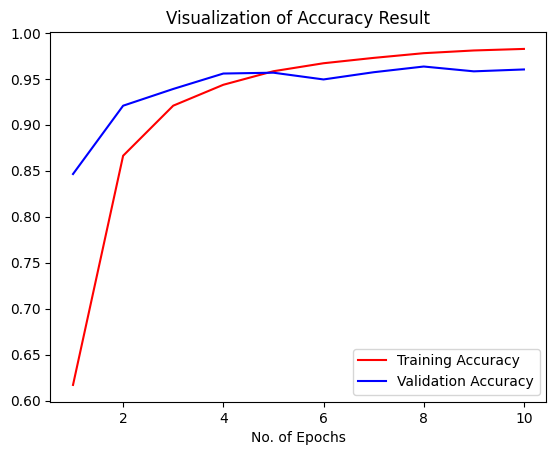

In [36]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

### Classification (othor model)

In [37]:
class_name = validation_set.class_names

In [39]:
test_set = tf.keras.utils.image_dataset_from_directory(
    "/content/Plant-Disease-Detection/test",
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 0 files belonging to 0 classes.


ValueError: No images found in directory /content/Plant-Disease-Detection/test. Allowed formats: ('.bmp', '.gif', '.jpeg', '.jpg', '.png')

# Predictions.

In [ ]:
y_pred = model.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)

In [ ]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

In [ ]:
Y_true

In [ ]:
predicted_categories

### Classification Report

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(Y_true,predicted_categories)

In [ ]:
# Precision Recall Fscore
print(classification_report(Y_true,predicted_categories,target_names=class_name))

In [ ]:
# Precision =(TP/(TP+FP))
# Recall =(TP/(TP+FN))
# Accuracy =((TP+TN)/(TP+TN+FP+FN))
# f1-score = Harmonic mean of Precision and Recall

In [ ]:
# pred = model.predict(testds)
# pred = [np.argmax(i) for i in pred]
# y_test = testds.classes
# print(classification_report(pred,y_test))

### Confusion Matrix

In [ ]:
cm = confusion_matrix(Y_true,predicted_categories)

In [ ]:
cm

In [ ]:
cm.shape

In [ ]:
plt.figure(figsize=(40, 40))
sns.heatmap(cm,annot=True,annot_kws={"size": 10})

plt.xlabel('Predicted Class',fontsize = 20)
plt.ylabel('Actual Class',fontsize = 20)
plt.title('Plant Disease Prediction Confusion Matrix',fontsize = 25)
plt.show()